In [6]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

In [81]:
def make_lognormal(xvals,d_med,std_g,N_t):
    import numpy as np
    i=0; yvals = np.zeros(len(xvals))
    for d in xvals:
        a = (N_t / (np.log(std_g)*np.sqrt(2*np.pi)));
        b = -(np.power(np.log(d)-np.log(d_med),2.0))/(2*np.power(np.log(std_g),2.0));
        yvals[i] = a * np.exp(b); 
        i = i + 1;
    return yvals

def make_log10normal(xvals,d_med,std_g,N_t):
    import numpy as np
    i=0; yvals = np.zeros(len(xvals))
    for d in xvals:
        a = (N_t / (np.log10(std_g)*np.sqrt(2*np.pi)));
        b = -(np.power(np.log10(d)-np.log10(d_med),2.0))/(2*np.power(np.log10(std_g),2.0));
        yvals[i] = a * np.exp(b); 
        i = i + 1;
    return yvals

In [82]:
diams = np.arange(1,1001,0.5)
diam_mids = (diams[0:len(diams)-1]+diams[1:])/2
diam_mids = np.concatenate((diam_mids[0]-(np.diff(diam_mids[0:2])),diam_mids,diam_mids[-1]+(np.diff(diam_mids[-2:]))),axis=0)
logDP_mids = np.log10(diam_mids)
dlogDP_mids = np.diff(logDP_mids)
lnDP_mids = np.log(diam_mids)
dlnDP_mids = np.diff(lnDP_mids)

In [83]:
aeromode = OrderedDict()
aeroprof = OrderedDict()
nt_bl = OrderedDict()
nt_ft = OrderedDict()
dm = OrderedDict()
sig = OrderedDict()

cases = ['high','low']

aeromode['high',0] = np.zeros(len(diams))
aeromode['low',0] = np.zeros(len(diams))
aeromode['high',1] = np.zeros(len(diams))
aeromode['low',1] = np.zeros(len(diams))

# Boundary Layer CCN Concnetrations (# / cm^3)
nt_bl['low',0] = 500
nt_bl['high',0] = 4000
nt_bl['low',1] = 1500
nt_bl['high',1] = 12000

# Free Troposphere CCN Concnetrations (# / cm^3)
nt_ft['low',0] = 150
nt_ft['high',0] = 150
nt_ft['low',1] = 450
nt_ft['high',1] = 450

#lognormal geometric mean diameter (nm)
dm['low',0] = 100
dm['high',0] = 100
dm['low',1] = 20
dm['high',1] = 20

# lognormal distribution width
sig['high',0] = 1.8
sig['low',0] = 1.8
sig['high',1] = 1.8
sig['low',1] = 1.8


for i in np.arange(0,2):
    for j in np.arange(0,2):
        casen = cases[i]
        aeromode[casen,j] = make_lognormal(diams,dm[casen,j],sig[casen,j],nt_bl[casen,j])


In [84]:
# Create Aerosol Vertical Profiles
alt_arr = np.arange(0,12000,10) # Altitude array in meeters
for i in np.arange(0,2):
    for j in np.arange(0,2):
        casen = cases[i]
        aeroprof[casen,j] = np.zeros(len(alt_arr))
        for k in np.arange(0,len(alt_arr)):
            curalt = alt_arr[k]
            if curalt < 2500:
                aeroprof[casen,j][k] = nt_bl[casen,j]
            elif curalt < 5000:
                aeroprof[casen,j][k] = nt_bl[casen,j] - (nt_bl[casen,j]-nt_ft[casen,j]) / 2500 * (curalt-2500)
            else:
                aeroprof[casen,j][k] = nt_ft[casen,j]
                

In [85]:
# Check intergration
casen = 'high'
j = 0
np.sum(aeromode[casen,j]*dlnDP_mids)

3999.8385444485175

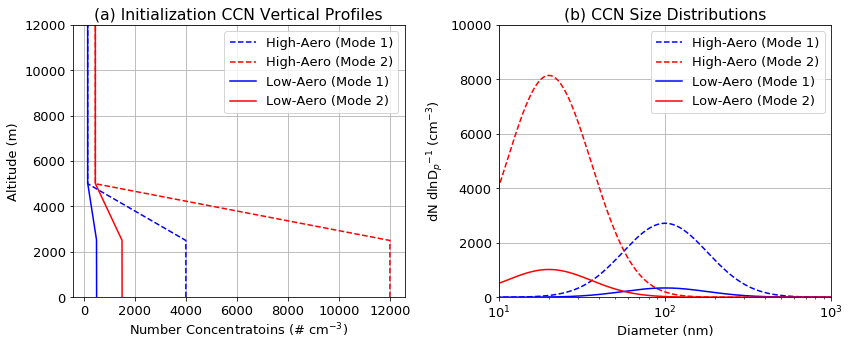

In [87]:
clrs = ['blue','red']
lss = ['--','-']

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,2,figsize=[12,5])
# Plot Aerosol Profiles
for i in np.arange(0,2): # Loop through cases
    for j in np.arange(0,2): # Loop through modes
        casen = cases[i]
        ax[0].plot(aeroprof[casen,j],alt_arr,c=clrs[j],ls=lss[i],label=casen.capitalize()+'-Aero (Mode '+str(j+1)+')')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_ylim([0,12000])
ax[0].set_xlabel('Number Concentratoins (# cm$^{-3}$)')
ax[0].set_title('(a) Initialization CCN Vertical Profiles')
ax[0].grid()
ax[0].legend()

# Plot Lognormal Size Distributions   
for i in np.arange(0,2): # Loop through cases
    for j in np.arange(0,2): # Loop through modes
        casen = cases[i]
        ax[1].plot(diams,aeromode[casen,j],c=clrs[j],ls=lss[i],label=casen.capitalize()+'-Aero (Mode '+str(j+1)+')')

ax[1].set_ylabel('dN dlnD$_p$$^{-1}$ (cm$^{-3}$)')
ax[1].set_ylim([0,10000])
ax[1].set_xscale('log')
ax[1].set_xlim([10,1000])
ax[1].set_xlabel('Diameter (nm)')
ax[1].set_title('(b) CCN Size Distributions')
ax[1].legend()
ax[1].grid()
plt.tight_layout()